In [341]:
import numpy as np
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/incident_event_log.csv


## Let's Read the file with pandas

In [342]:
df = pd.read_csv("../input/incident_event_log.csv")

***A sneakpeak into dataset***

In [343]:
df.head(2)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00


## Checking the shape of dataset (TOTAL RECORDS & ATTRIBUTES)

In [344]:
df.shape

(141712, 36)

## Let's look at the datatype of each attribute

In [345]:
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

## Let's see if there are any missing values in data.

In [346]:
df.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

There are not any null values in data but the missing or known data is represented by **"?"** in this dataset (as per documentation of the dataset).

# Basic EDA (Exploratory Data Analysis) using Pandas Profiling Report. 
Let's explore dataset as whole as well as on individual level and in relation with our predicted variable

In [347]:
df.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


## A bird-eye view of dataset using pandas profile report

In [348]:
#pp.ProfileReport(df)

# **Data Preprocessing**

Let's first convert the "open_at" and "closed_at" to datetime, so that duration feature can be engineered from them.

In [349]:
#but before that, just like head, now w're looking at tail of datset, just to get an idea about variables and it's values
df.tail(2)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141711,INC0121064,Closed,False,1,0,3,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


### Let's create our prediction variable
*for a better understanding and clear illustrations,the EDA will be performed only on duration days, not including hours and minutes, for prediction (which is our primary goal), we'll be using all three units (combined in one variable)*

In [350]:
# since our dates is stored in non-standard format, and datatype of variable is also object, so, first lets these into a standard panda's
# format and convert the datatype into date too.
df.opened_at=pd.to_datetime(df.opened_at,format="%d/%m/%Y %H:%M")

In [351]:
df.closed_at=pd.to_datetime(df.closed_at,format="%d/%m/%Y %H:%M")

### Let's calculate duration of incident and store it in a new column of dataframe, named "duration"
*Duration = date_closed - date_opened *

In [352]:
df["duration"]=(df.closed_at - df.opened_at)

In [353]:
df['durationdays']=df['duration'].dt.days

In [354]:
hours, remainder = divmod(df["duration"].dt.seconds, 3600)
minutes, seconds = divmod(remainder, 60)

In [355]:
df['durationhours']=hours
df['durationminutes']=minutes
df.head(2)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,duration,durationdays,durationhours,durationminutes
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,?,?,code 5,Resolved by 149,29/2/2016 11:29,2016-03-05 12:00:00,5 days 10:44:00,5,10,44
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,?,?,code 5,Resolved by 149,29/2/2016 11:29,2016-03-05 12:00:00,5 days 10:44:00,5,10,44


### Let's see what's inside the durationdays variable

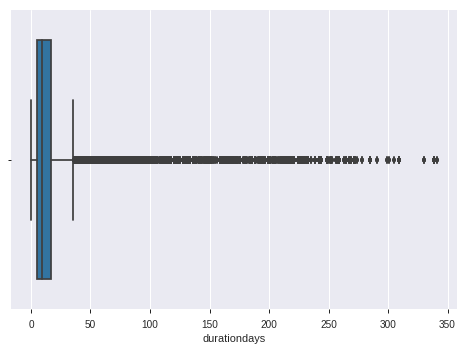

In [356]:
sns.boxplot(x="durationdays",data=df)

most of the data in durationdays variable lie between 0 and below 50 days, however there are many outliers going upto 340. 

In [357]:
df.durationdays.describe()

count    141712.000000
mean         16.724314
std          27.117936
min           0.000000
25%           5.000000
50%           9.000000
75%          17.000000
max         341.000000
Name: durationdays, dtype: float64

In [358]:
df.durationdays.mode()

0    5
dtype: int64

it can be  clearly seen in boxplot that outliers are quite higher in comparison to the mean, it means the data is right-skewed. The mode is the measure we can opt, so the most of the incident are solved in 5 days. 

## Let's look into each attribute.


### 1. active 
this attribute shows whether the record is active or closed/canceled;

In [359]:
df.active.unique()

array([ True, False])

**let's look at the count of each value in the variable using a countplot **

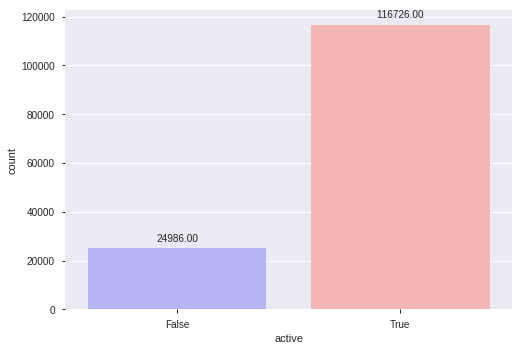

In [360]:
splot=sns.countplot(x="active", data=df, palette="bwr")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [361]:
print("Percentages:\n",(df.active.value_counts()/df.shape[0])*100)

Percentages:
 True     82.368466
False    17.631534
Name: active, dtype: float64


### 2. assigned_to  
"assign_to" attribute refers to the identifier of the user in charge of the incident; since a total count of **27496** of such records are **"?"** , which means it is unkown that who was charge of that incident. For better understanding let's replace **"?"** with **"0"**

In [362]:
df["assigned_to"]=df["assigned_to"].replace({r'\?'}, '0', regex=True)

In [363]:
df["assigned_to"].unique()

array(['0', 'Resolver 89', 'Resolver 31', 'Resolver 6', 'Resolver 125',
       'Resolver 78', 'Resolver 186', 'Resolver 216', 'Resolver 236',
       'Resolver 17', 'Resolver 249', 'Resolver 193', 'Resolver 180',
       'Resolver 175', 'Resolver 97', 'Resolver 76', 'Resolver 201',
       'Resolver 215', 'Resolver 227', 'Resolver 159', 'Resolver 170',
       'Resolver 99', 'Resolver 253', 'Resolver 198', 'Resolver 135',
       'Resolver 94', 'Resolver 149', 'Resolver 188', 'Resolver 4',
       'Resolver 83', 'Resolver 33', 'Resolver 26', 'Resolver 69',
       'Resolver 145', 'Resolver 176', 'Resolver 150', 'Resolver 34',
       'Resolver 71', 'Resolver 134', 'Resolver 183', 'Resolver 127',
       'Resolver 57', 'Resolver 18', 'Resolver 48', 'Resolver 182',
       'Resolver 203', 'Resolver 84', 'Resolver 184', 'Resolver 28',
       'Resolver 242', 'Resolver 130', 'Resolver 212', 'Resolver 121',
       'Resolver 129', 'Resolver 166', 'Resolver 241', 'Resolver 229',
       'Resolver 115', '

* See the **"unknown"** has replaced all the **"?"** in the records

In [364]:
df['assigned_to'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [365]:
df['assigned_to'].unique()

array(['0', '89', '31', '6', '125', '78', '186', '216', '236', '17',
       '249', '193', '180', '175', '97', '76', '201', '215', '227', '159',
       '170', '99', '253', '198', '135', '94', '149', '188', '4', '83',
       '33', '26', '69', '145', '176', '150', '34', '71', '134', '183',
       '127', '57', '18', '48', '182', '203', '84', '184', '28', '242',
       '130', '212', '121', '129', '166', '241', '229', '115', '126',
       '165', '64', '74', '153', '2', '208', '214', '141', '13', '15',
       '58', '207', '24', '148', '117', '82', '251', '139', '225', '111',
       '152', '132', '224', '7', '120', '167', '137', '247', '25', '196',
       '197', '93', '237', '234', '22', '230', '140', '40', '155', '169',
       '92', '56', '101', '44', '133', '202', '100', '168', '124', '43',
       '37', '246', '147', '178', '233', '45', '109', '194', '55', '223',
       '8', '23', '163', '59', '172', '200', '187', '238', '53', '199',
       '51', '49', '171', '210', '164', '219', '10', '73',

Now, redudancy of the word "Resolver" has been ommitted from the data, 0 refers to the unkown and all other ids refer to the resolver, we can now convert this attribute into integer

In [366]:
df.assigned_to=df.assigned_to.astype(int)

### 2. Assigned Group 
"assign_to" attribute refers to identifier of the support group in charge of the incident; since a total count of **14213** of such records are **"?"** , which means it is unkown that who was charge of that incident. For better understanding let's replace **"?"** with **"0"**

In [367]:
df.assignment_group.unique()

array(['Group 56', 'Group 70', 'Group 24', 'Group 25', 'Group 23',
       'Group 28', 'Group 5', 'Group 15', 'Group 12', 'Group 33',
       'Group 54', 'Group 29', 'Group 66', 'Group 65', 'Group 68',
       'Group 58', 'Group 27', 'Group 72', 'Group 30', 'Group 50',
       'Group 55', 'Group 62', 'Group 47', 'Group 22', 'Group 39',
       'Group 73', '?', 'Group 20', 'Group 46', 'Group 67', 'Group 74',
       'Group 34', 'Group 69', 'Group 3', 'Group 31', 'Group 26',
       'Group 53', 'Group 76', 'Group 6', 'Group 61', 'Group 57',
       'Group 37', 'Group 48', 'Group 17', 'Group 49', 'Group 43',
       'Group 60', 'Group 10', 'Group 9', 'Group 45', 'Group 14',
       'Group 59', 'Group 64', 'Group 51', 'Group 75', 'Group 11',
       'Group 19', 'Group 21', 'Group 77', 'Group 2', 'Group 13',
       'Group 35', 'Group 81', 'Group 44', 'Group 63', 'Group 79',
       'Group 32', 'Group 78', 'Group 36', 'Group 82', 'Group 80',
       'Group 4', 'Group 71', 'Group 18', 'Group 38', 'Group 1

In [368]:
df["assignment_group"]=df["assignment_group"].replace({r'\?'}, '0', regex=True)

In [369]:
df['assignment_group'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [370]:
df.assignment_group.unique()

array(['56', '70', '24', '25', '23', '28', '5', '15', '12', '33', '54',
       '29', '66', '65', '68', '58', '27', '72', '30', '50', '55', '62',
       '47', '22', '39', '73', '0', '20', '46', '67', '74', '34', '69',
       '3', '31', '26', '53', '76', '6', '61', '57', '37', '48', '17',
       '49', '43', '60', '10', '9', '45', '14', '59', '64', '51', '75',
       '11', '19', '21', '77', '2', '13', '35', '81', '44', '63', '79',
       '32', '78', '36', '82', '80', '4', '71', '18', '38', '16', '41',
       '7', '8'], dtype=object)

just like previous attribute here is also redudancy of the word "Group", which has been ommitted from the data, 0 refers to the unkown and all other ids refer to the groups, we can now convert this attribute into integer

In [371]:
df.assignment_group=df.assignment_group.astype(int)

### Caller ID
this attribute is identifier of the user affected;

In [372]:
df.caller_id.nunique()

5245

In [373]:
df.caller_id.unique()

array(['Caller 2403', 'Caller 4416', 'Caller 4491', ..., 'Caller 1384',
       'Caller 5100', 'Caller 1899'], dtype=object)

Let's see if there are records which doesn't contain right information

In [374]:
df[~df['caller_id'].str.contains('Caller')].shape[0]

29

In [375]:
df["caller_id"]=df["caller_id"].replace({r'\?'}, '0', regex=True)

In [376]:
df['caller_id'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [377]:
df['caller_id'].unique()

array(['2403', '4416', '4491', ..., '1384', '5100', '1899'], dtype=object)

In [378]:
df['caller_id']=df['caller_id'].astype(int)

### Category
first-level description of the affected service;

In [379]:
df.category.unique()

array(['Category 55', 'Category 40', 'Category 20', 'Category 9',
       'Category 53', 'Category 44', 'Category 45', 'Category 42',
       'Category 32', 'Category 8', 'Category 24', 'Category 61',
       'Category 37', 'Category 26', 'Category 23', 'Category 62',
       'Category 17', 'Category 13', 'Category 35', '?', 'Category 43',
       'Category 34', 'Category 19', 'Category 46', 'Category 63',
       'Category 51', 'Category 22', 'Category 30', 'Category 31',
       'Category 15', 'Category 47', 'Category 7', 'Category 57',
       'Category 25', 'Category 56', 'Category 38', 'Category 49',
       'Category 4', 'Category 28', 'Category 41', 'Category 36',
       'Category 54', 'Category 29', 'Category 3', 'Category 27',
       'Category 33', 'Category 58', 'Category 2', 'Category 21',
       'Category 16', 'Category 50', 'Category 59', 'Category 12',
       'Category 52', 'Category 5', 'Category 6', 'Category 10',
       'Category 48', 'Category 14'], dtype=object)

In [380]:
df["category"]=df["category"].replace({r'\?'}, '0', regex=True)

In [381]:
df['category'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [382]:
df['category']=df['category'].astype(int)

In [383]:
df.category.unique()

array([55, 40, 20,  9, 53, 44, 45, 42, 32,  8, 24, 61, 37, 26, 23, 62, 17,
       13, 35,  0, 43, 34, 19, 46, 63, 51, 22, 30, 31, 15, 47,  7, 57, 25,
       56, 38, 49,  4, 28, 41, 36, 54, 29,  3, 27, 33, 58,  2, 21, 16, 50,
       59, 12, 52,  5,  6, 10, 48, 14])

## Caused by
*identifier of the RFC responsible by the incident;*

In [384]:
df.caused_by.unique()

array(['?', 'CHG0000132', 'CHG0000097', 'CHG0001327'], dtype=object)

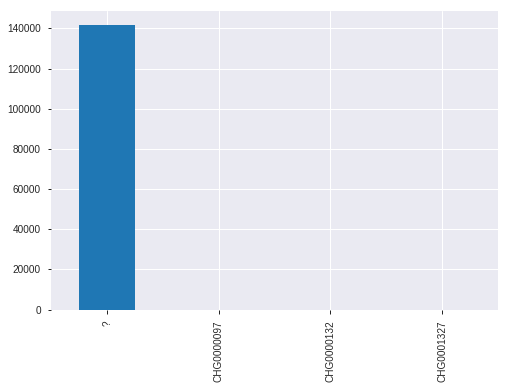

In [385]:
df.caused_by.value_counts().plot(kind='bar')

In [386]:
df.caused_by.nunique()/df.shape[0]

2.822626171389861e-05

In [387]:
#since most of the values in the variable are "?" we would delete this variable because its of no use, we can't fill all these
df=df.drop("caused_by",axis=1)

### Closed Code
identifier of the resolution of the incident;

In [388]:
df.closed_code.unique()

array(['code 5', 'code 10', 'code 3', 'code 7', 'code 6', 'code 1',
       'code 11', 'code 8', 'code 4', 'code 9', 'code 2', 'code 17',
       'code 16', '?', 'code 15', 'code 13', 'code 14', 'code 12'],
      dtype=object)

In [389]:
df[~df['closed_code'].str.contains('code')].shape[0]

714

In [390]:
df["closed_code"]=df["closed_code"].replace({r'\?'}, '0', regex=True)

In [391]:
df['closed_code'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [392]:
df.closed_code.unique()

array(['5', '10', '3', '7', '6', '1', '11', '8', '4', '9', '2', '17',
       '16', '0', '15', '13', '14', '12'], dtype=object)

In [393]:
df.closed_code=df.closed_code.astype(int)

### cmdb_ci
(confirmation item) identifier used to report the affected item (not mandatory);

In [394]:
df.cmdb_ci.unique()

array(['?', 'cmdb_ci 31', 'cmdb_ci 23', 'cmdb_ci 22', 'cmdb_ci 6',
       'cmdb_ci 3', 'cmdb_ci 49', 'cmdb_ci 15', 'cmdb_ci 16',
       'cmdb_ci 19', 'cmdb_ci 48', 'cmdb_ci 14', 'cmdb_ci 28',
       'cmdb_ci 21', 'cmdb_ci 11', 'cmdb_ci 10', 'cmdb_ci 2', 'cmdb_ci 7',
       'cmdb_ci 5', 'cmdb_ci 12', 'cmdb_ci 35', 'cmdb_ci 26',
       'cmdb_ci 53', 'cmdb_ci 4', 'cmdb_ci 17', 'cmdb_ci 51',
       'cmdb_ci 33', 'cmdb_ci 36', 'cmdb_ci 13', 'cmdb_ci 27',
       'cmdb_ci 8', 'cmdb_ci 9', 'cmdb_ci 42', 'cmdb_ci 39', 'cmdb_ci 34',
       'cmdb_ci 24', 'cmdb_ci 46', 'cmdb_ci 47', 'cmdb_ci 41',
       'cmdb_ci 38', 'cmdb_ci 20', 'cmdb_ci 50', 'cmdb_ci 40',
       'cmdb_ci 18', 'cmdb_ci 37', 'cmdb_ci 45', 'cmdb_ci 32',
       'cmdb_ci 43', 'cmdb_ci 29', 'cmdb_ci 30', 'cmdb_ci 25'],
      dtype=object)

In [395]:
df[~df['cmdb_ci'].str.contains('cmdb_ci')].shape[0]

141267

In [396]:
#since most of the values in the variable are "?" we would delete this variable because its of no use, we can't fill all these
df=df.drop("cmdb_ci",axis=1)

### contact_type
categorical attribute that shows by what means the incident was reported;

In [397]:
df.contact_type.unique()

array(['Phone', 'Email', 'Self service', 'Direct opening', 'IVR'],
      dtype=object)

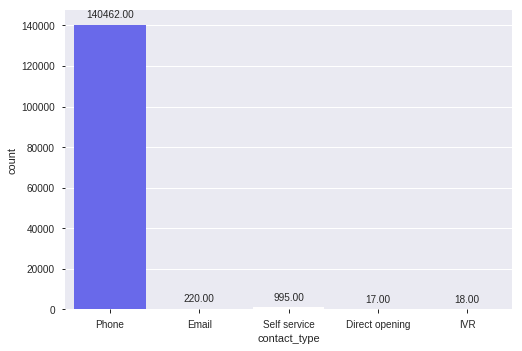

In [398]:
splot=sns.countplot(x="contact_type", data=df, palette="bwr")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [399]:
df.contact_type.nunique()/df.shape[0]

3.528282714237326e-05

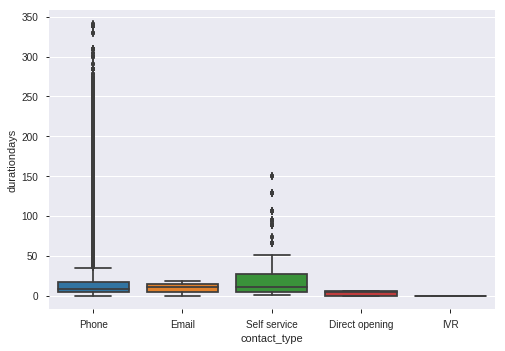

In [400]:
sns.boxplot(y='durationdays',x='contact_type',data=df)

Since most of the data in this attribute is populated by the "phone" value and box plot shows no significant impact of this attribute on predictive attribute, hence droping this attribute would not affect much on our analysis. 

In [401]:
df=df.drop("contact_type", axis=1)

### Impact
description of the impact caused by the incident (values: 1-High; 2-Medium; 3-Low);

In [402]:
df.impact.unique()

array(['2 - Medium', '1 - High', '3 - Low'], dtype=object)

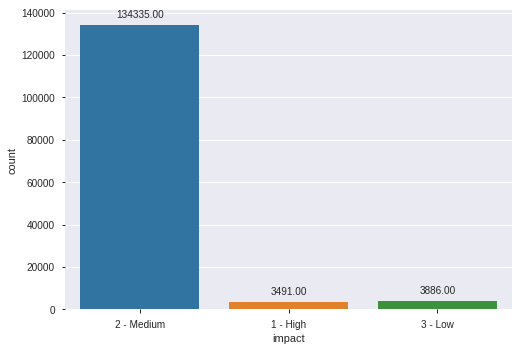

In [403]:
splot=sns.countplot(x="impact", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

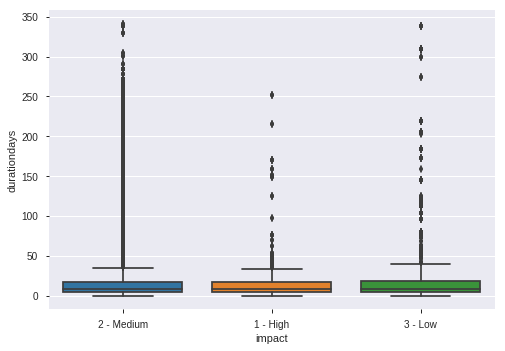

In [404]:
sns.boxplot(y='durationdays',x='impact',data=df)

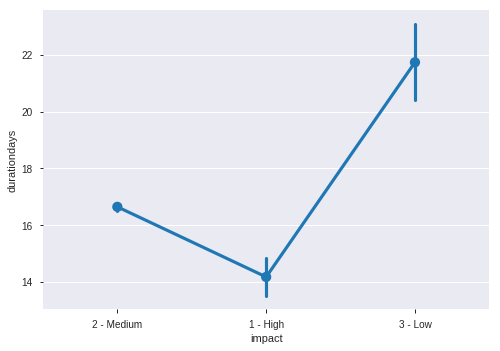

In [405]:
sns.pointplot(x="impact", y="durationdays", data=df)

In [406]:
df['impact'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [407]:
df.impact=df.impact.astype(int)

### Incident State
eight levels controlling the incident management process transitions from opening until closing the case;

In [408]:
df["incident_state"].unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence', '-100'],
      dtype=object)

In [409]:
#we don't know what is this value, there is also no documentation for it
df.loc[df["incident_state"]=="-100"]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,rfc,vendor,closed_code,resolved_by,resolved_at,closed_at,duration,durationdays,durationhours,durationminutes
115641,INC0028089,-100,True,0,0,1,True,290,Opened by 305,2016-05-10 22:09:00,...,?,?,7,Resolved by 175,16/6/2016 13:02,2016-06-21 13:07:00,41 days 14:58:00,41,14,58
115642,INC0028089,-100,True,0,0,2,True,290,Opened by 305,2016-05-10 22:09:00,...,?,?,7,Resolved by 175,16/6/2016 13:02,2016-06-21 13:07:00,41 days 14:58:00,41,14,58
124507,INC0030413,-100,True,1,0,14,True,2950,Opened by 17,2016-05-17 14:42:00,...,?,?,7,Resolved by 70,21/6/2016 17:28,2016-06-26 18:00:00,40 days 03:18:00,40,3,18
124508,INC0030413,-100,True,1,0,15,True,2950,Opened by 17,2016-05-17 14:42:00,...,?,?,7,Resolved by 70,21/6/2016 17:28,2016-06-26 18:00:00,40 days 03:18:00,40,3,18
124509,INC0030413,-100,True,1,0,20,True,2950,Opened by 17,2016-05-17 14:42:00,...,?,?,7,Resolved by 70,21/6/2016 17:28,2016-06-26 18:00:00,40 days 03:18:00,40,3,18


In [410]:
#lets replace it with the mode of the variable, as we don't know what it implies, we consider it as error.
df["incident_state"]=df["incident_state"].replace({r'-100'}, df.incident_state.mode(), regex=True)

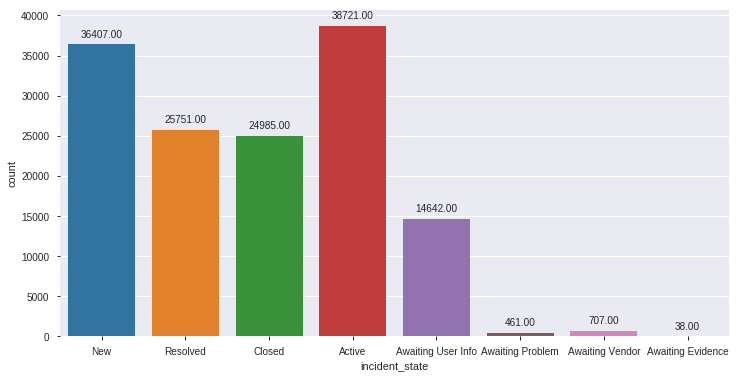

In [411]:
plt.figure(figsize=(12,6))
splot=sns.countplot(x="incident_state", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

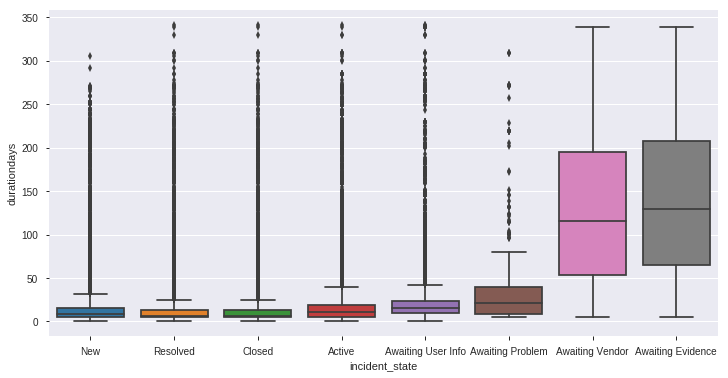

In [412]:
plt.figure(figsize=(12,6))
sns.boxplot(y='durationdays',x='incident_state',data=df)

In [413]:
df["incident_state"].unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence'],
      dtype=object)

**What we have done in the below code is, encode those string values in numerical ones as ML algorithms don't take string as input**

In [414]:
from sklearn.preprocessing import LabelEncoder

In [415]:
enc = LabelEncoder().fit(df.incident_state)
df.incident_state = enc.transform(df.incident_state)

In [416]:
df.incident_state.unique()

array([6, 7, 5, 0, 3, 2, 4, 1])

In [417]:
enc.inverse_transform(df.incident_state)

array(['New', 'Resolved', 'Resolved', ..., 'Active', 'Resolved', 'Closed'],
      dtype=object)

**let's pickle this encoded values that may be useful for decoding while implementing model**

In [418]:
import pickle
with open('enc.pickle', 'wb') as file:
    pickle.dump(enc, file, pickle.HIGHEST_PROTOCOL)

### Location
*  identifier of the location of the place affected;

In [419]:
df.location.unique()

array(['Location 143', 'Location 165', 'Location 204', 'Location 93',
       'Location 108', 'Location 161', 'Location 46', 'Location 42',
       'Location 229', 'Location 98', 'Location 69', 'Location 172',
       'Location 51', 'Location 44', 'Location 142', 'Location 36',
       'Location 135', 'Location 15', 'Location 79', 'Location 55',
       'Location 179', 'Location 171', 'Location 56', 'Location 224',
       'Location 131', 'Location 54', 'Location 136', 'Location 2',
       'Location 40', 'Location 70', 'Location 115', 'Location 197',
       'Location 59', 'Location 212', '?', 'Location 245', 'Location 141',
       'Location 232', 'Location 18', 'Location 125', 'Location 241',
       'Location 128', 'Location 96', 'Location 249', 'Location 91',
       'Location 170', 'Location 208', 'Location 162', 'Location 9',
       'Location 153', 'Location 117', 'Location 218', 'Location 111',
       'Location 100', 'Location 71', 'Location 33', 'Location 39',
       'Location 112', 'Loc

In [420]:
df["location"]=df["location"].replace({r'\?'}, '0', regex=True)

In [421]:
df['location'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [422]:
df.location=df.location.astype(int)

In [423]:
df.location.unique()

array([143, 165, 204,  93, 108, 161,  46,  42, 229,  98,  69, 172,  51,
        44, 142,  36, 135,  15,  79,  55, 179, 171,  56, 224, 131,  54,
       136,   2,  40,  70, 115, 197,  59, 212,   0, 245, 141, 232,  18,
       125, 241, 128,  96, 249,  91, 170, 208, 162,   9, 153, 117, 218,
       111, 100,  71,  33,  39, 112,  72,  97,  68, 193, 210, 113, 158,
       124,  37, 196,  85,  47,  24,  43,  14,  77, 109,  41,  38, 226,
       240,  76,  99, 213, 118,  82,  35, 199,  28, 242,  78, 107,  45,
       247,   3, 216, 133,  86,  12, 231, 223,  10, 177,  83, 187, 160,
       220, 209,   5, 190, 173, 205,  34,  64,  25, 110, 114, 235, 134,
       207, 225, 221, 237, 234, 194, 168,  17, 211,  90, 138,  92,  81,
       195, 222,  60, 182,   8,  27, 169, 101,  75, 228, 236,  21, 174,
        66,   6, 233, 203, 201, 214, 140, 157, 243, 155, 102,  13, 120,
       244, 188,  11, 185,  65,  23,  49, 186, 248,  87,  61, 129, 148,
       184, 183, 149, 137,  95, 167, 200,  30, 147, 166,  20, 12

In [424]:
#pp.ProfileReport(df)

### made_sla
boolean attribute that shows whether the incident exceeded the target SLA;

In [425]:
df.made_sla.unique()

array([ True, False])

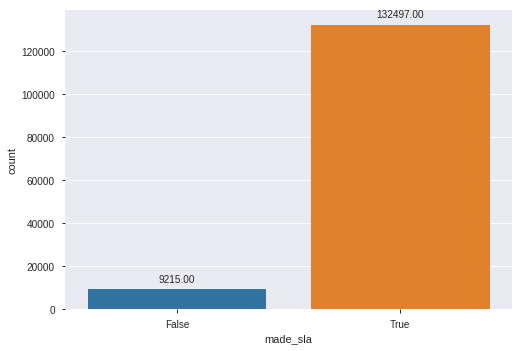

In [426]:
splot=sns.countplot(x="made_sla", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

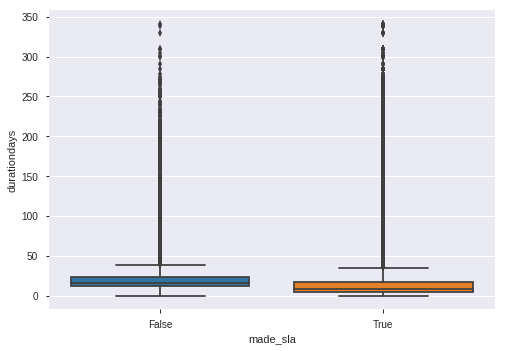

In [427]:
sns.boxplot(y='durationdays',x='made_sla',data=df)

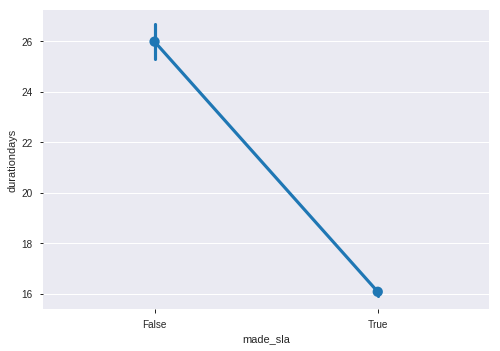

In [428]:
sns.pointplot(x="made_sla", y="durationdays", data=df)

this pointplot plot shows significant affect of sla on duration, that means if sla is true duration is less, but that can be because of imbalance values in dataset which can be clearly seen in count plot above.

### Notify
categorical attribute that shows whether notifications were generated for the incident;

In [429]:
df.notify.unique()

array(['Do Not Notify', 'Send Email'], dtype=object)

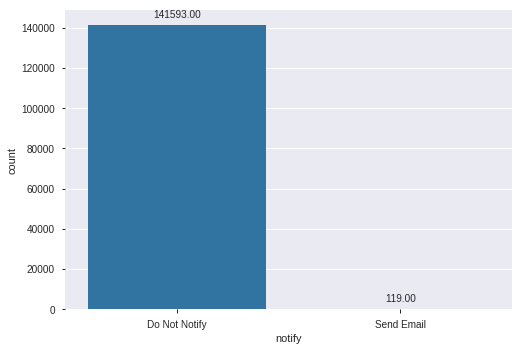

In [430]:
splot=sns.countplot(x="notify", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

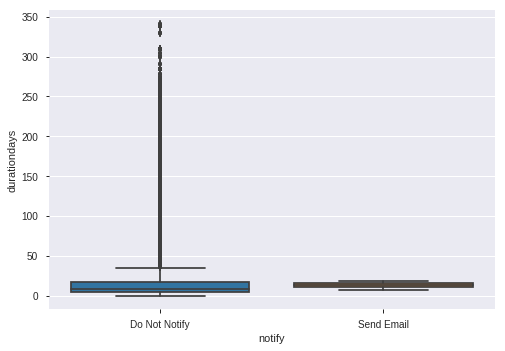

In [431]:
sns.boxplot(y='durationdays',x='notify',data=df)

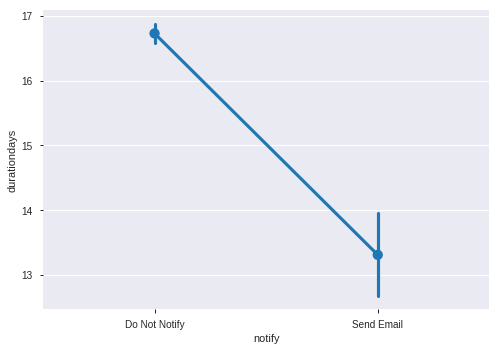

In [432]:
sns.pointplot(x="notify", y="durationdays", data=df)

In [433]:
df=df.drop("notify",axis=1)

clearly a huge class inbalance and not significant affect of predictive variable, that is why dropping it is the best option

### Opened at
* incident user opening date and time;

In [434]:
df.groupby(df.opened_at.dt.date).size()

opened_at
2016-02-29    1342
2016-03-01    2198
2016-03-02    3168
2016-03-03    2826
2016-03-04    2836
              ... 
2017-02-10      29
2017-02-13      15
2017-02-14       6
2017-02-15      13
2017-02-16       8
Length: 207, dtype: int64

Text(0.5, 0, 'Date')

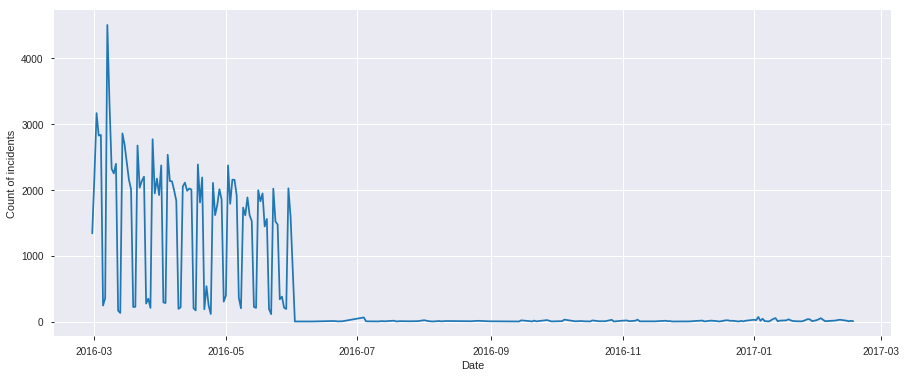

In [435]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df.opened_at.dt.date.unique(), y=df.groupby(df.opened_at.dt.date).size(), data=df)
plt.ylabel("Count of incidents")
plt.xlabel("Date")

this can be clearly seen number of incidents openeds in first half of 2016 are rising and lowering again n again, but from onwards incidents are in a stable and also lower number. 

most of the ML models don't understand date datatype so let convert this date not only in a numerical field but lets engineer some features from it too.

In [436]:
df["opened_at_day"]=df.opened_at.dt.day
df["opened_at_month"]=df.opened_at.dt.month
df["opened_at_year"]=df.opened_at.dt.year
df["opened_at_hour"]=df.opened_at.dt.hour
df["opened_at_minute"]=df.opened_at.dt.minute

In [437]:
df[["opened_at","opened_at_day","opened_at_month","opened_at_year","opened_at_hour","opened_at_minute"]].head(2)

,opened_at,opened_at_day,opened_at_month,opened_at_year,opened_at_hour,opened_at_minute
0,2016-02-29 01:16:00,29,2,2016,1,16
1,2016-02-29 01:16:00,29,2,2016,1,16


In [438]:
#this is redudant and not useful now.
df=df.drop("opened_at",axis=1)

### Opened_by
*  identifier of the user who reported the incident;

In [439]:
df.opened_by.unique()

array(['Opened by  8', 'Opened by  397', 'Opened by  180',
       'Opened by  131', 'Opened by  24', 'Opened by  40',
       'Opened by  433', 'Opened by  62', 'Opened by  501',
       'Opened by  301', 'Opened by  4', 'Opened by  55',
       'Opened by  257', 'Opened by  128', 'Opened by  221',
       'Opened by  386', 'Opened by  240', 'Opened by  325',
       'Opened by  381', 'Opened by  185', 'Opened by  191',
       'Opened by  59', 'Opened by  239', 'Opened by  305',
       'Opened by  443', 'Opened by  390', 'Opened by  512',
       'Opened by  461', 'Opened by  536', 'Opened by  9', '?',
       'Opened by  226', 'Opened by  316', 'Opened by  120',
       'Opened by  168', 'Opened by  503', 'Opened by  228',
       'Opened by  155', 'Opened by  517', 'Opened by  247',
       'Opened by  444', 'Opened by  124', 'Opened by  47',
       'Opened by  20', 'Opened by  431', 'Opened by  237',
       'Opened by  441', 'Opened by  79', 'Opened by  505',
       'Opened by  468', 'Opened 

In [440]:
df["opened_by"]=df["opened_by"].replace({r'\?'}, '0', regex=True)

In [441]:
df['opened_by'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [442]:
df.opened_by=df.opened_by.astype(int)

In [443]:
df.opened_by.unique()

array([  8, 397, 180, 131,  24,  40, 433,  62, 501, 301,   4,  55, 257,
       128, 221, 386, 240, 325, 381, 185, 191,  59, 239, 305, 443, 390,
       512, 461, 536,   9,   0, 226, 316, 120, 168, 503, 228, 155, 517,
       247, 444, 124,  47,  20, 431, 237, 441,  79, 505, 468, 502, 267,
       360, 142, 188, 174, 419, 317, 385, 392, 460, 322,   2, 524, 533,
        75, 157, 356, 402, 368, 364,  12,  44, 193, 453,  17, 108, 351,
        70, 520, 465, 184,  58,  80,  10, 172, 467, 296, 119, 528, 277,
       423, 253,  60, 337, 369, 464,  91, 298,   3, 500, 262,  39, 515,
       530, 321, 319,  94, 255,  73, 412, 246, 382, 109, 163, 242,  32,
       463,  68, 106, 320,  46, 350, 293, 354, 111, 535, 469, 403, 147,
       230, 219, 182, 151, 486,  72, 256, 233, 472, 353, 122, 101,  90,
       216, 430, 420, 198, 265, 209, 346,   5, 280, 270, 144, 344, 212,
       118, 347, 462, 104, 194, 440, 483, 159, 481,  30, 438, 141, 162,
        14,  74, 223, 447,  77, 519, 195, 148, 160,  54,  26, 37

### Priority
* calculated by the system based on 'impact' and 'urgency';

In [444]:
df.priority.unique()

array(['3 - Moderate', '2 - High', '4 - Low', '1 - Critical'],
      dtype=object)

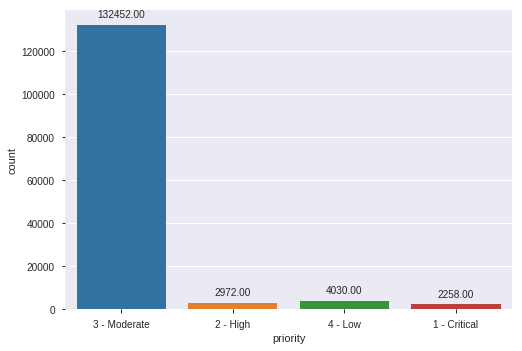

In [445]:
splot=sns.countplot(x="priority", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

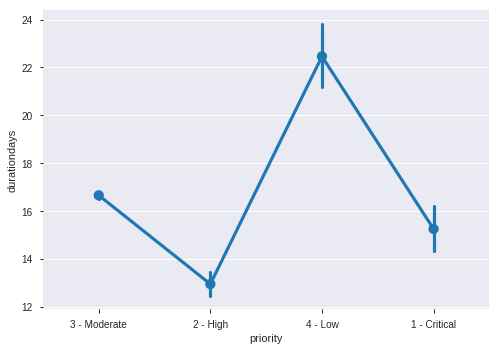

In [446]:
sns.pointplot(x="priority", y="durationdays", data=df)

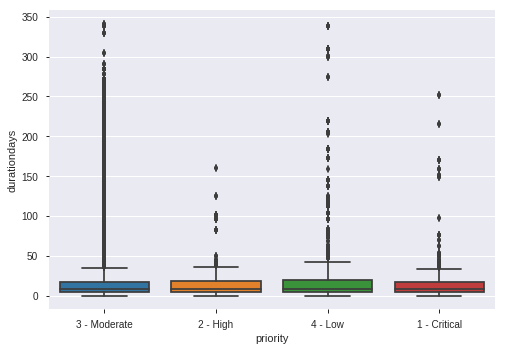

In [447]:
sns.boxplot(y='durationdays',x='priority',data=df)

In [448]:
df['priority'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [449]:
df.priority=df.priority.astype(int)

In [450]:
df.priority.unique()

array([3, 2, 4, 1])

### Problem ID
identifier of the problem associated with the incident;

In [451]:
df.problem_id.unique()

array(['?', 'Problem ID  2', 'Problem ID  4', 'Problem ID  44',
       'Problem ID  141', 'Problem ID  5', 'Problem ID  17',
       'Problem ID  23', 'Problem ID  20', 'Problem ID  19',
       'Problem ID  24', 'Problem ID  12', 'Problem ID  6',
       'Problem ID  7', 'Problem ID  10', 'Problem ID  40',
       'Problem ID  33', 'Problem ID  26', 'Problem ID  15',
       'Problem ID  9', 'Problem ID  8', 'Problem ID  14',
       'Problem ID  18', 'Problem ID  11', 'Problem ID  72',
       'Problem ID  246', 'Problem ID  16', 'Problem ID  21',
       'Problem ID  28', 'Problem ID  74', 'Problem ID  35',
       'Problem ID  104', 'Problem ID  27', 'Problem ID  51',
       'Problem ID  30', 'Problem ID  29', 'Problem ID  3',
       'Problem ID  31', 'Problem ID  45', 'Problem ID  32',
       'Problem ID  38', 'Problem ID  91', 'Problem ID  13',
       'Problem ID  36', 'Problem ID  46', 'Problem ID  84',
       'Problem ID  39', 'Problem ID  70', 'Problem ID  41',
       'Problem ID  118'

In [452]:
df.problem_id[df.problem_id=="?"].count()

139417

In [453]:
(df.problem_id[df.problem_id=="?"].count()/df.shape[0])*100

98.38051823416507

In [454]:
#since most of the values in the variable are "?" we would delete this variable because its of no use, we can't fill all these
df=df.drop("problem_id",axis=1)

### reassignment_count
number of times the incident has the group or the support analysts changed;

In [455]:
df.reassignment_count.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

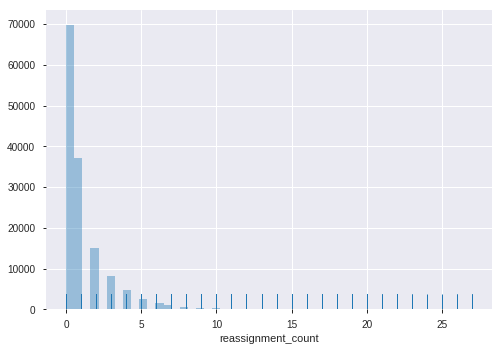

In [456]:
sns.distplot(df.reassignment_count,kde=False,rug=True);

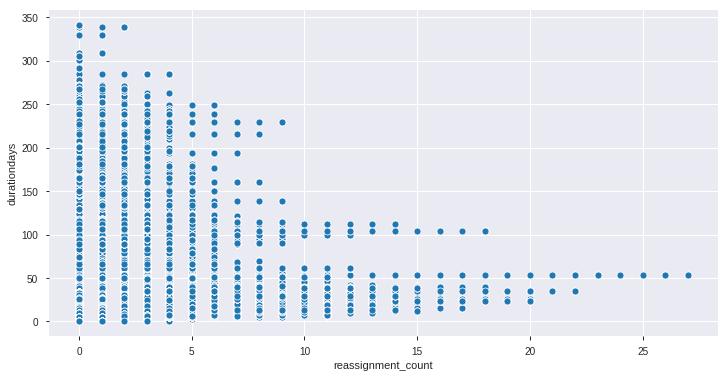

In [457]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="reassignment_count", y="durationdays", data=df)

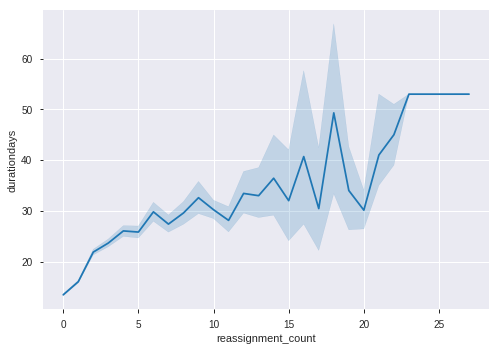

In [458]:
sns.lineplot(x="reassignment_count", y="durationdays", data=df)

not quite steady but with the increase of reassignment count duration in days for solving the incident is also increasing.

### reopen_count
* number of times the incident resolution was rejected by the caller;

In [459]:
df.reopen_count.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

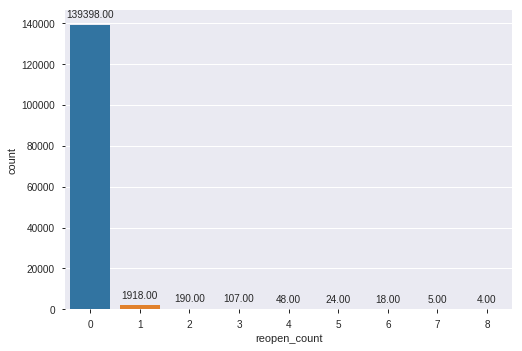

In [460]:
splot=sns.countplot(x="reopen_count", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

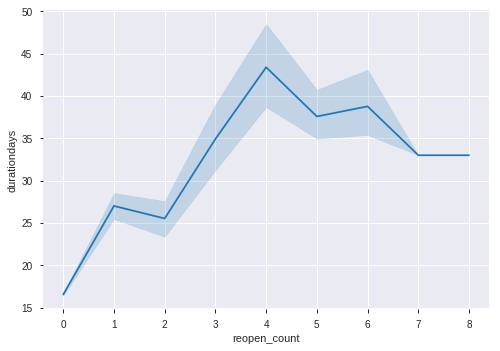

In [461]:
sns.lineplot(x="reopen_count", y="durationdays", data=df)

there is not the quite significant and clear relation between the reopen days and durationdays and that can also be because of class inbalance which can be clearly seen in above graph.

### resolved_by
* identifier of the user who resolved the incident;

In [462]:
df.resolved_by.unique()

array(['Resolved by 149', 'Resolved by 81', 'Resolved by 5',
       'Resolved by 113', 'Resolved by 62', 'Resolved by 71',
       'Resolved by 197', 'Resolved by 208', 'Resolved by 215',
       'Resolved by 30', 'Resolved by 227', 'Resolved by 158',
       'Resolved by 85', 'Resolved by 163', 'Resolved by 15',
       'Resolved by 99', 'Resolved by 66', 'Resolved by 184',
       'Resolved by 183', 'Resolved by 77', 'Resolved by 196',
       'Resolved by 206', 'Resolved by 174', 'Resolved by 106',
       'Resolved by 139', 'Resolved by 143', 'Resolved by 153',
       'Resolved by 89', 'Resolved by 231', 'Resolved by 180',
       'Resolved by 121', 'Resolved by 32', 'Resolved by 21',
       'Resolved by 175', 'Resolved by 133', 'Resolved by 171',
       'Resolved by 3', 'Resolved by 76', 'Resolved by 24',
       'Resolved by 130', 'Resolved by 159', 'Resolved by 134',
       'Resolved by 33', 'Resolved by 56', 'Resolved by 64',
       'Resolved by 83', 'Resolved by 166', 'Resolved by 120'

In [463]:
df["resolved_by"]=df["resolved_by"].replace({r'\?'}, '0', regex=True)

In [464]:
df['resolved_by'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [465]:
df.resolved_by=df.resolved_by.astype(int)

In [466]:
df.resolved_by.unique()

array([149,  81,   5, 113,  62,  71, 197, 208, 215,  30, 227, 158,  85,
       163,  15,  99,  66, 184, 183,  77, 196, 206, 174, 106, 139, 143,
       153,  89, 231, 180, 121,  32,  21, 175, 133, 171,   3,  76,  24,
       130, 159, 134,  33,  56,  64,  83, 166, 120,  53,  16, 195,  27,
       165, 169, 167, 221, 103, 117, 220, 114,  57,  13,  67, 137,   2,
       189, 132, 170, 127, 135, 188,  22, 229, 125, 204, 100, 118,   6,
        11,  87, 108, 150, 123, 226, 115, 193,  23, 216, 213,  20, 209,
       126,  37, 152,  52, 210,  91,  69,  41, 119,  90, 151, 112, 109,
       212, 107, 203,  35, 131,  42,  98,  84,   9, 218,   7,  75,  54,
       104, 155, 182, 200, 190,  50,  48,  46, 177, 154,  38, 191, 147,
        40, 146, 179,  92,  44,   0, 202, 101, 111, 105, 136, 181,  31,
       178,  58, 145,  29, 225, 173,  45, 198, 211,  86, 140, 214,  49,
       124, 116,  19,   8, 187, 199, 161, 129, 142,  70, 223, 164, 122,
       128,  36, 138,  74, 102, 230,  96, 176,  95, 156,   4,  4

### rfc
request for change) identifier of the change request associated with the incident;

In [467]:
df.rfc.unique()

array(['?', 'CHG0000404', 'CHG0000647', 'CHG0000127', 'CHG0000646',
       'CHG0000507', 'CHG0001863', 'CHG0000084', 'CHG0001271',
       'CHG0000132', 'CHG0000047', 'CHG0000405', 'CHG0001019',
       'CHG0000336', 'CHG0000089', 'CHG0000536', 'CHG0000097',
       'CHG0000433', 'CHG0000402', 'CHG0000558', 'CHG0000232',
       'CHG0001829', 'CHG0001301', 'CHG0003167', 'CHG0000428',
       'CHG0000707', 'CHG0003447', 'CHG0000914', 'CHG0000704',
       'CHG0000293', 'CHG0001656', 'CHG0000535', 'CHG0000461',
       'CHG0000177', 'CHG0000171', 'CHG0000149', 'CHG0000772',
       'CHG0000179', 'CHG0000705', 'CHG0000213', 'CHG0000207',
       'CHG0000209', 'CHG0000561', 'CHG0000775', 'CHG0000323',
       'CHG0000332', 'CHG0000363', 'CHG0001056', 'CHG0000553',
       'CHG0000230', 'CHG0000918', 'CHG0000925', 'CHG0000434',
       'CHG0000622', 'CHG0001864', 'CHG0000771', 'CHG0000357',
       'CHG0002096', 'CHG0000359', 'CHG0000406', 'CHG0000342',
       'CHG0000893', 'CHG0000697', 'CHG0000355', '

In [468]:
df.rfc[df.rfc=="?"].count()

140721

In [469]:
((df.rfc[df.rfc=="?"].count())/df.shape[0])*100

99.30069436603817

In [470]:
#since most of the values in the variable are "?" we would delete this variable because its of no use, we can't fill all these
df=df.drop("rfc",axis=1)

### subcategory
second-level description of the affected service (related to the first level description, i.e., to category);

In [471]:
df.subcategory.unique()

array(['Subcategory 170', 'Subcategory 215', 'Subcategory 125',
       'Subcategory 97', 'Subcategory 168', 'Subcategory 229',
       'Subcategory 94', 'Subcategory 185', 'Subcategory 110',
       'Subcategory 164', 'Subcategory 271', 'Subcategory 220',
       'Subcategory 224', 'Subcategory 9', 'Subcategory 291',
       'Subcategory 194', 'Subcategory 106', 'Subcategory 191',
       'Subcategory 135', 'Subcategory 175', 'Subcategory 223',
       'Subcategory 130', 'Subcategory 23', 'Subcategory 47',
       'Subcategory 107', 'Subcategory 127', 'Subcategory 54',
       'Subcategory 75', 'Subcategory 192', 'Subcategory 303',
       'Subcategory 114', 'Subcategory 120', 'Subcategory 103',
       'Subcategory 200', 'Subcategory 3', 'Subcategory 123',
       'Subcategory 16', 'Subcategory 270', 'Subcategory 167',
       'Subcategory 144', 'Subcategory 90', 'Subcategory 31',
       'Subcategory 29', 'Subcategory 13', 'Subcategory 302',
       'Subcategory 113', 'Subcategory 28', 'Subcategor

In [472]:
((df.subcategory[df.subcategory=="?"].count())/df.shape[0])*100

0.07832787625606864

In [473]:
df["subcategory"]=df["subcategory"].replace({r'\?'}, '0', regex=True)

In [474]:
df['subcategory'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [475]:
df.subcategory=df.subcategory.astype(int)

In [476]:
df.subcategory.unique()

array([170, 215, 125,  97, 168, 229,  94, 185, 110, 164, 271, 220, 224,
         9, 291, 194, 106, 191, 135, 175, 223, 130,  23,  47, 107, 127,
        54,  75, 192, 303, 114, 120, 103, 200,   3, 123,  16, 270, 167,
       144,  90,  31,  29,  13, 302, 113,  28, 109,  88, 117,   0, 156,
       150,  44, 162, 289,  80, 231,  83,  25, 153, 105, 277,   4, 189,
       112,  78, 283, 154, 132, 225,  52, 208, 151, 176,  12, 301, 202,
        65, 245, 173, 228,  40, 259, 275, 169,  86, 269, 251, 140,   6,
       182,  20, 274, 207,  46,  57, 101, 261, 219,  50, 258, 174,  30,
       305, 115, 166, 184,  67,  48, 294,  59,  89, 204, 227, 198, 262,
       255, 116, 276, 177, 197,  99, 178,  11, 145,  69, 199, 292,  43,
         8, 157, 282, 281, 179,  32, 298, 146, 161, 196, 260,  36, 124,
       149,  92, 111, 118, 203, 100,  18, 159, 102,  17, 249, 296, 300,
       142, 183, 250,  66, 248,  82, 233, 252,  68, 181, 218, 188,  60,
       134, 243, 187, 226, 205, 247, 163,  64, 285, 217, 242, 13

### sys_created_at
second-level description of the affected service (related to the first level description, i.e., to category);

In [477]:
((df.sys_created_at[df.sys_created_at=="?"].count())/df.shape[0])*100

37.45342666817207

In [478]:
df=df.drop("sys_created_at",axis=1)

### sys_created_by
identifier of the user who registered the incident;

In [479]:
((df.sys_created_by[df.sys_created_by=="?"].count())/df.shape[0])*100

37.45342666817207

In [480]:
df.sys_created_by[df.sys_created_by=="?"].mode()

0    ?
dtype: object

In [481]:
df.sys_created_by[df.sys_created_by!="?"].mode()

0    Created by 10
dtype: object

In [482]:
((df.sys_created_by[df.sys_created_by=="Created by 10"].count())/df.shape[0])*100

17.09311843739415

In [483]:
#since most of the values in the variable are "?" we would delete this variable because its of no use, we can't fill all these
df=df.drop("sys_created_by",axis=1)

### sys_mod_count
number of incident updates until that moment;

In [484]:
df.sys_mod_count.unique()

array([  0,   2,   3,   4,   1,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  18,  19,  14,  15,  16,  17,  20,  21,  22,  23,  26,  28,
        30,  31,  32,  33,  34,  91,  92,  93,  99, 101, 102,  44,  45,
        60,  61,  62, 105, 106,  24,  43,  49,  50,  51,  25,  27,  29,
        41,  42,  40,  39,  46,  47,  48,  53,  55,  56,  57,  59,  58,
        65,  66,  67,  38, 119, 128, 129,  64,  73,  74,  77,  83,  89,
        90,  75,  35,  70,  71,  52, 115, 116,  54,  36,  37,  88,  87,
        94,  95,  86,  72,  63, 112, 113, 114, 117,  76,  79,  80,  81,
        69,  82,  78,  68,  84,  85,  96,  97, 100, 103,  98])

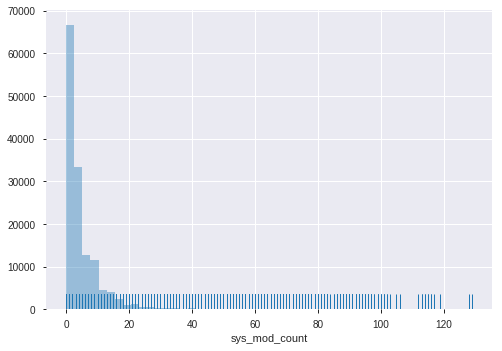

In [485]:
sns.distplot(df.sys_mod_count,kde=False,rug=True);

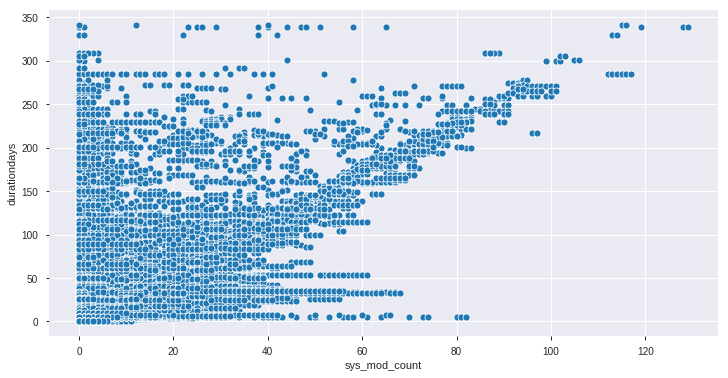

In [486]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="sys_mod_count", y="durationdays", data=df)

<Figure size 864x432 with 0 Axes>

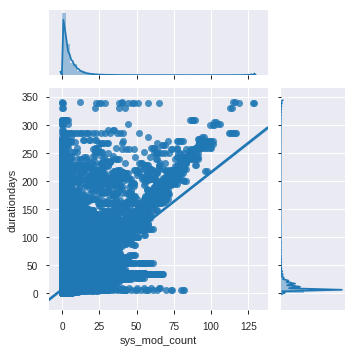

In [487]:
plt.figure(figsize=(12,6))
sns.jointplot(x="sys_mod_count", y="durationdays", height=5, ratio=3,kind="reg",data=df)

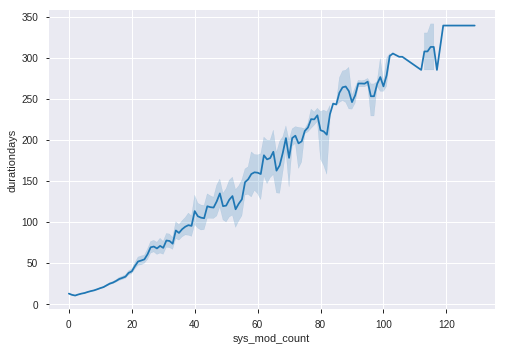

In [488]:
sns.lineplot(x="sys_mod_count", y="durationdays", data=df)

as the value of sys_mod_count is increasing so is the duration of problem, we can say these both are highly correlated

### sys_updated_at
incident system update date and time;

In [489]:
((df.sys_updated_at[df.sys_updated_at=="?"].count())/df.shape[0])*100

0.0

In [490]:
df.sys_updated_at=pd.to_datetime(df.sys_updated_at,format="%d/%m/%Y %H:%M")

In [491]:
df["sys_updated_day"]=df.sys_updated_at.dt.day
df["sys_updated_month"]=df.sys_updated_at.dt.month
df["sys_updated_year"]=df.sys_updated_at.dt.year
df["sys_updated_hour"]=df.sys_updated_at.dt.hour
df["sys_updated_minute"]=df.sys_updated_at.dt.minute

In [492]:
df[["sys_updated_at","sys_updated_day","sys_updated_month","sys_updated_year","sys_updated_hour","sys_updated_minute"]].head(2)

,sys_updated_at,sys_updated_day,sys_updated_month,sys_updated_year,sys_updated_hour,sys_updated_minute
0,2016-02-29 01:23:00,29,2,2016,1,23
1,2016-02-29 08:53:00,29,2,2016,8,53


In [493]:
df=df.drop("sys_updated_at",axis=1)

### sys_updated_by 
identifier of the user who updated the incident and generated the current log record;

In [494]:
df.sys_updated_by.unique()

array(['Updated by 21', 'Updated by 642', 'Updated by 804',
       'Updated by 908', 'Updated by 746', 'Updated by 703',
       'Updated by 332', 'Updated by 451', 'Updated by 340',
       'Updated by 465', 'Updated by 241', 'Updated by 60',
       'Updated by 265', 'Updated by 723', 'Updated by 307',
       'Updated by 967', 'Updated by 798', 'Updated by 653',
       'Updated by 750', 'Updated by 164', 'Updated by 862',
       'Updated by 874', 'Updated by 88', 'Updated by 928',
       'Updated by 336', 'Updated by 135', 'Updated by 974',
       'Updated by 713', 'Updated by 199', 'Updated by 664',
       'Updated by 578', 'Updated by 111', 'Updated by 310',
       'Updated by 402', 'Updated by 789', 'Updated by 15',
       'Updated by 429', 'Updated by 727', 'Updated by 259',
       'Updated by 507', 'Updated by 277', 'Updated by 213',
       'Updated by 833', 'Updated by 868', 'Updated by 681',
       'Updated by 419', 'Updated by 608', 'Updated by 614',
       'Updated by 881', 'Up

In [495]:
((df.sys_updated_by[df.sys_updated_by=="?"].count())/df.shape[0])*100

0.0

In [496]:
df['sys_updated_by'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [497]:
df.sys_updated_by=df.sys_updated_by.astype(int)

### u_priority_confirmation
boolean attribute that shows whether the priority field has been double-checked;

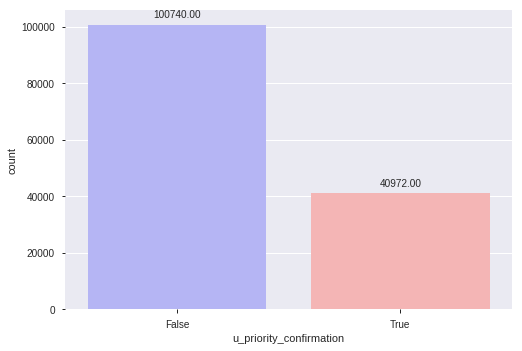

In [498]:
splot=sns.countplot(x="u_priority_confirmation", data=df, palette="bwr")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

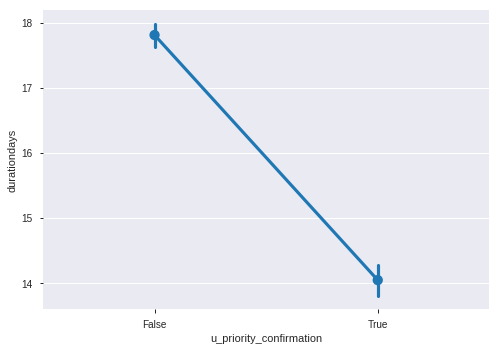

In [499]:
sns.pointplot(x="u_priority_confirmation", y="durationdays", data=df)

### u_symptom
description of the user perception about service availability;

In [500]:
df.u_symptom.unique()

array(['Symptom 72', 'Symptom 471', 'Symptom 450', 'Symptom 232',
       'Symptom 580', 'Symptom 311', '?', 'Symptom 470', 'Symptom 592',
       'Symptom 530', 'Symptom 4', 'Symptom 583', 'Symptom 253',
       'Symptom 2', 'Symptom 26', 'Symptom 609', 'Symptom 529',
       'Symptom 560', 'Symptom 273', 'Symptom 87', 'Symptom 116',
       'Symptom 607', 'Symptom 159', 'Symptom 226', 'Symptom 509',
       'Symptom 208', 'Symptom 571', 'Symptom 117', 'Symptom 7',
       'Symptom 473', 'Symptom 568', 'Symptom 605', 'Symptom 118',
       'Symptom 242', 'Symptom 486', 'Symptom 6', 'Symptom 327',
       'Symptom 17', 'Symptom 314', 'Symptom 270', 'Symptom 382',
       'Symptom 387', 'Symptom 312', 'Symptom 218', 'Symptom 84',
       'Symptom 324', 'Symptom 107', 'Symptom 189', 'Symptom 236',
       'Symptom 263', 'Symptom 472', 'Symptom 315', 'Symptom 491',
       'Symptom 134', 'Symptom 121', 'Symptom 224', 'Symptom 474',
       'Symptom 112', 'Symptom 126', 'Symptom 102', 'Symptom 563',
   

In [501]:
((df.u_symptom[df.u_symptom=="?"].count())/df.shape[0])*100

23.261262278423843

In [502]:
df.u_symptom.mode()

0    Symptom 491
dtype: object

In [503]:
((df.u_symptom[df.u_symptom=="Symptom 491"].count())/df.shape[0])*100

36.68355537992548

In [504]:
#As the mode is in sigficant amount,we can replace "?" with mode.
df["u_symptom"]=df["u_symptom"].replace({r'\?'}, '0', regex=True)

In [505]:
df['u_symptom'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [506]:
df.u_symptom=df.u_symptom.astype(int)

### urgency
description of the urgency informed by the user for the incident resolution (values: 1-High; 2-Medium; 3-Low);

In [507]:
df.urgency.unique()

array(['2 - Medium', '3 - Low', '1 - High'], dtype=object)

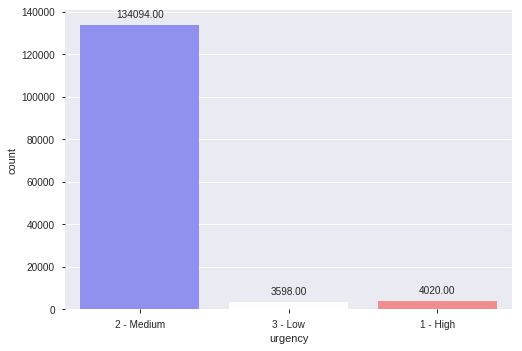

In [508]:
splot=sns.countplot(x="urgency", data=df, palette="bwr")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

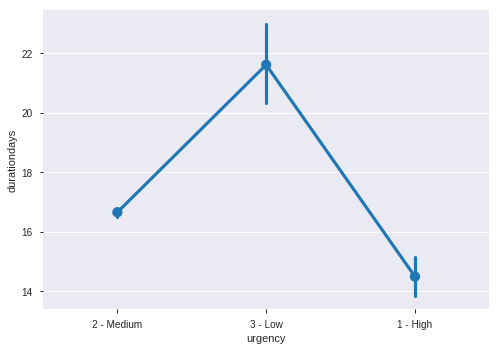

In [509]:
sns.pointplot(x="urgency", y="durationdays", data=df)

graph is showing that, high urgency is having lowest durationdays, but that can't be proved right because of class inbalance. 

In [510]:
df['urgency'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [511]:
df.urgency=df.urgency.astype(int)

### vendor
identifier of the vendor in charge of the incident;

In [512]:
((df.vendor[df.vendor=="?"].count())/df.shape[0])*100

99.82781980354521

In [513]:
df=df.drop("vendor",axis=1)

In [514]:
df.head(2)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hour,opened_at_minute,sys_updated_day,sys_updated_month,sys_updated_year,sys_updated_hour,sys_updated_minute
0,INC0000045,6,True,0,0,0,True,2403,8,21,...,29,2,2016,1,16,29,2,2016,1,23
1,INC0000045,7,True,0,0,2,True,2403,8,642,...,29,2,2016,1,16,29,2,2016,8,53


In [515]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'sys_updated_by', 'location', 'category', 'subcategory', 'u_symptom',
       'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to',
       'knowledge', 'u_priority_confirmation', 'closed_code', 'resolved_by',
       'resolved_at', 'closed_at', 'duration', 'durationdays', 'durationhours',
       'durationminutes', 'opened_at_day', 'opened_at_month', 'opened_at_year',
       'opened_at_hour', 'opened_at_minute', 'sys_updated_day',
       'sys_updated_month', 'sys_updated_year', 'sys_updated_hour',
       'sys_updated_minute'],
      dtype='object')

In [516]:
#let's drop all those variables which are not significant or correlate to predictive variable
df=df.drop("closed_code",axis=1)
df=df.drop("resolved_by",axis=1)
df=df.drop("closed_at",axis=1)

In [517]:
df=df.drop("resolved_at",axis=1)

In [518]:
df=df.drop("number",axis=1)

In [519]:
df.dtypes

incident_state                       int64
active                                bool
reassignment_count                   int64
reopen_count                         int64
sys_mod_count                        int64
made_sla                              bool
caller_id                            int64
opened_by                            int64
sys_updated_by                       int64
location                             int64
category                             int64
subcategory                          int64
u_symptom                            int64
impact                               int64
urgency                              int64
priority                             int64
assignment_group                     int64
assigned_to                          int64
knowledge                             bool
u_priority_confirmation               bool
duration                   timedelta64[ns]
durationdays                         int64
durationhours                        int64
durationmin

In [520]:
#lets consolidate durationdays , dayshours, durationminutes. 
df["duration"]=df["durationdays"]+(df["durationhours"]/24) +(df["durationminutes"]/1440)

In [521]:
df[["duration","durationdays","durationhours","durationminutes"]]

,duration,durationdays,durationhours,durationminutes
0,5.447222,5,10,44
1,5.447222,5,10,44
2,5.447222,5,10,44
3,5.447222,5,10,44
4,6.222222,6,5,20
...,...,...,...,...
141707,0.030556,0,0,44
141708,0.097917,0,2,21
141709,0.097917,0,2,21
141710,0.097917,0,2,21


In [522]:
df=df.drop(["durationdays","durationhours","durationminutes"],axis=1)

# Let now train our models

In [523]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [524]:
train,test=train_test_split(df,test_size=0.2,random_state=0,stratify=df['duration'])
train_X=train.drop('duration',axis=1)
train_Y=train['duration']
test_X=test.drop('duration',axis=1)
test_Y=test['duration']
X=df.drop('duration',axis=1)
Y=df['duration']

**for the first time we'll train a model on RandomForrestRegressor to see which variables are important and which are not, all irrelevant features will be omitted gradually and then different models will be trained on only relevent model, and best among them would be selected **

In [525]:
model=RandomForestRegressor()
model.fit(train_X,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [526]:
pred_y = model.predict(test_X)
rmse = np.sqrt(mean_squared_error(pred_y,test_Y))

In [527]:
rmse

12.508196749704085

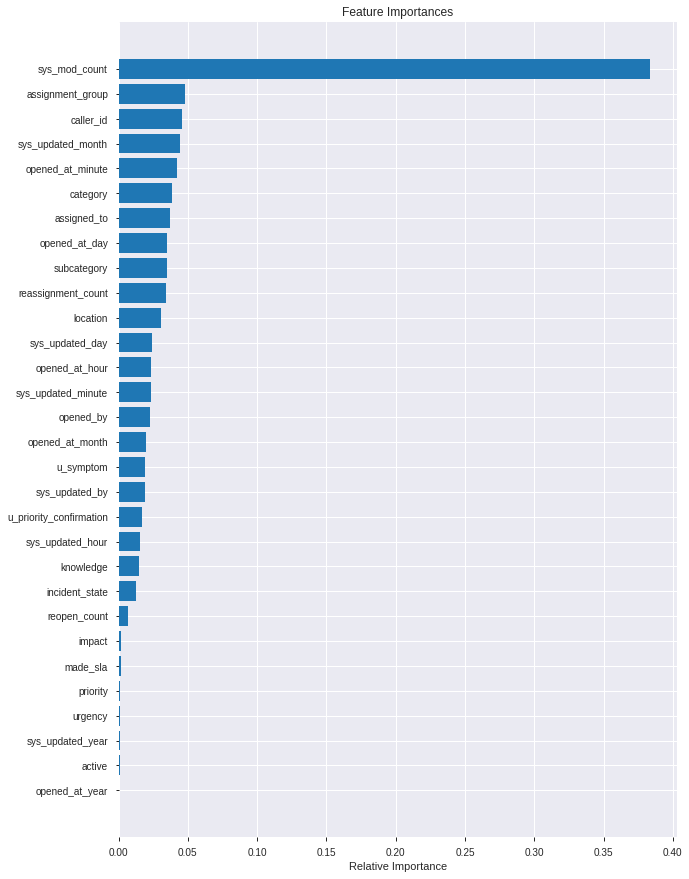

In [530]:
features = train_X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

this chart is known as "feature importance chart" which shows the importance of a variable or its prediction power, besides correlation and other measures this is also used and considered more accurate way for feature selection. 

In [531]:
# drop the least significant variables who does not affect much or none on predictive variable according to the feature importance chart.
df=df.drop(["opened_at_year","sys_updated_year","active","urgency","impact","made_sla","priority","reopen_count","incident_state","knowledge"],axis=1)

In [532]:
df.head(2)

,reassignment_count,sys_mod_count,caller_id,opened_by,sys_updated_by,location,category,subcategory,u_symptom,assignment_group,...,u_priority_confirmation,duration,opened_at_day,opened_at_month,opened_at_hour,opened_at_minute,sys_updated_day,sys_updated_month,sys_updated_hour,sys_updated_minute
0,0,0,2403,8,21,143,55,170,72,56,...,False,5.447222,29,2,1,16,29,2,1,23
1,0,2,2403,8,642,143,55,170,72,56,...,False,5.447222,29,2,1,16,29,2,8,53


In [533]:
train,test=train_test_split(df,test_size=0.2,random_state=0,stratify=df['duration'])
train_X=train.drop('duration',axis=1)
train_Y=train['duration']
test_X=test.drop('duration',axis=1)
test_Y=test['duration']
X=df.drop('duration',axis=1)
Y=df['duration']

In [534]:
model=RandomForestRegressor()
model.fit(train_X,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [535]:
pred_y = model.predict(test_X)
rmse = np.sqrt(mean_squared_error(pred_y,test_Y))

In [536]:
rmse

12.313398361172895

*as we can see the rmse or accuracy has improved by omitting less important features*

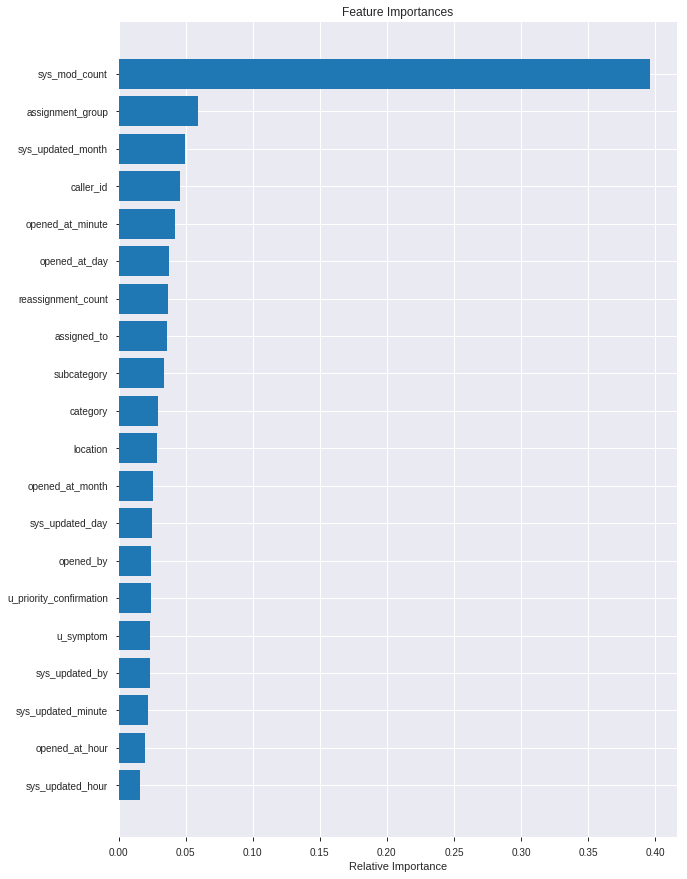

In [537]:
features = train_X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [538]:
# Again dropping the least significant variables who does not affect much or none on predictive variable according to the feature importance chart.
df=df.drop(["sys_updated_hour","u_symptom","opened_at_hour","sys_updated_minute","sys_updated_by"],axis=1)

In [539]:
df.head(2)

,reassignment_count,sys_mod_count,caller_id,opened_by,location,category,subcategory,assignment_group,assigned_to,u_priority_confirmation,duration,opened_at_day,opened_at_month,opened_at_minute,sys_updated_day,sys_updated_month
0,0,0,2403,8,143,55,170,56,0,False,5.447222,29,2,16,29,2
1,0,2,2403,8,143,55,170,56,0,False,5.447222,29,2,16,29,2


In [540]:
train,test=train_test_split(df,test_size=0.2,random_state=0,stratify=df['duration'])
train_X=train.drop('duration',axis=1)
train_Y=train['duration']
test_X=test.drop('duration',axis=1)
test_Y=test['duration']
X=df.drop('duration',axis=1)
Y=df['duration']

In [541]:
model=RandomForestRegressor()
model.fit(train_X,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [542]:
pred_y = model.predict(test_X)
rmse = np.sqrt(mean_squared_error(pred_y,test_Y))
rmse

11.53220732817163

## Let's train Multiple models now and compare them
***since the problem is of regression and not classification, the measure we'll be using is RMSE (root mean square error)***

In [543]:
import xgboost as xgb

In [544]:
# Declaring Multiple Regressors
from sklearn import linear_model
models = [
        linear_model.Ridge(),
        linear_model.LinearRegression(),
        linear_model.Lasso(),
        linear_model.ElasticNet(),
        linear_model.LassoLars(),
        linear_model.OrthogonalMatchingPursuit(),
        linear_model.BayesianRidge(),
        RandomForestRegressor(),
        xgb.XGBRegressor()
]

In [545]:
from sklearn.metrics import mean_squared_error

model_scores = list()

for model in models:
    try:
        model_name = str(model).split("(")[0]
        print(model_name)
        model.fit(train_X,train_Y)
        pred_y = model.predict(test_X)
        rmse = np.sqrt(mean_squared_error(pred_y,test_Y))
        model_scores.append([model_name,rmse])
    except:
        print("except")
        pass

model_names = pd.DataFrame(model_scores)[0].tolist()
rmses = np.round(pd.DataFrame(model_scores)[1].tolist(),1)
model_scores = pd.Series(rmses,index=model_names)

Ridge
LinearRegression
Lasso
ElasticNet
LassoLars
OrthogonalMatchingPursuit
BayesianRidge
RandomForestRegressor


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGBRegressor


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [546]:
model_scores

Ridge                        19.8
LinearRegression             19.8
Lasso                        20.3
ElasticNet                   20.6
LassoLars                    27.1
OrthogonalMatchingPursuit    21.6
BayesianRidge                19.8
RandomForestRegressor        11.5
XGBRegressor                 17.6
dtype: float64

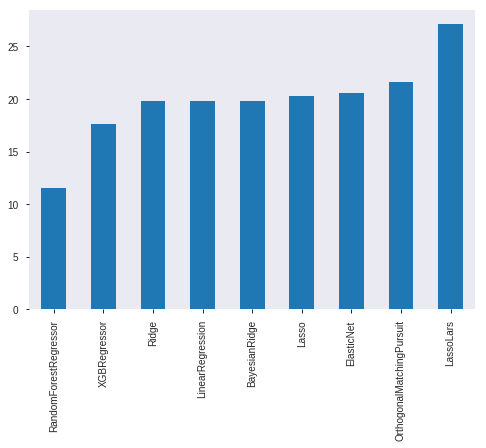

In [547]:
model_scores.sort_values(ascending = True).plot(kind = 'bar', grid=False)

As we can see the most accurate or best model is RandomForestRegressor, we'll be using that for deployment.

In [548]:
bestmodel=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
bestmodel.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [549]:
pred_y = bestmodel.predict(test_X)
rmse = np.sqrt(mean_squared_error(pred_y,test_Y))
rmse

10.638983384729848

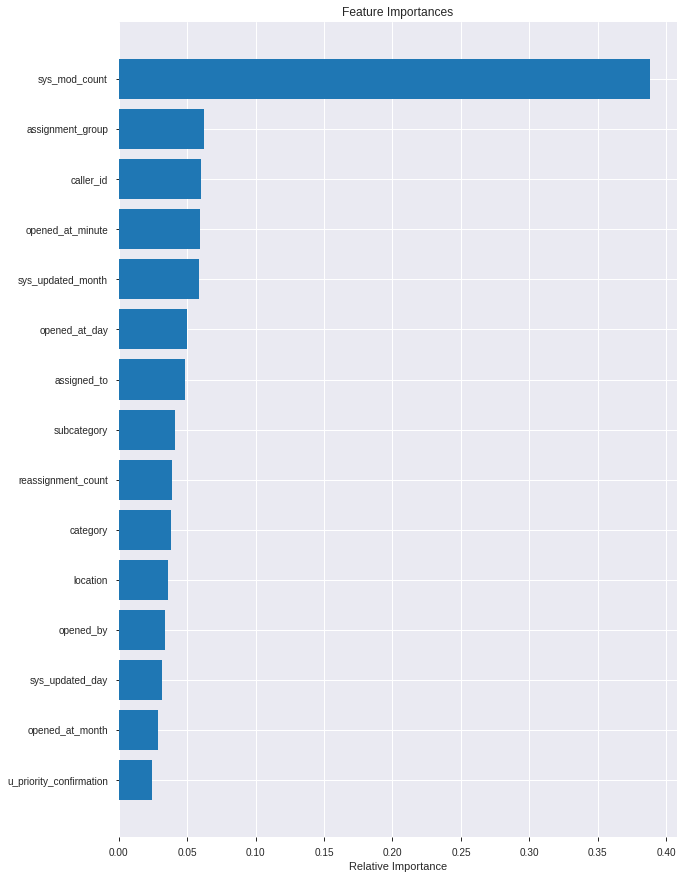

In [550]:
features = train_X.columns
importances = bestmodel.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

***u_priority_confirmation seems to be less important , we can ommit this one too.***

In [551]:
priority=df["u_priority_confirmation"]

In [552]:
df=df.drop("u_priority_confirmation",axis=1)

In [553]:
train,test=train_test_split(df,test_size=0.2,random_state=0,stratify=df['duration'])
train_X=train.drop('duration',axis=1)
train_Y=train['duration']
test_X=test.drop('duration',axis=1)
test_Y=test['duration']
X=df.drop('duration',axis=1)
Y=df['duration']

***Let's fine tune our model a bit***

In [554]:
bestmodel=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
bestmodel.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [555]:
pred_y = bestmodel.predict(test_X)
rmse = np.sqrt(mean_squared_error(pred_y,test_Y))
rmse

10.654526893922737

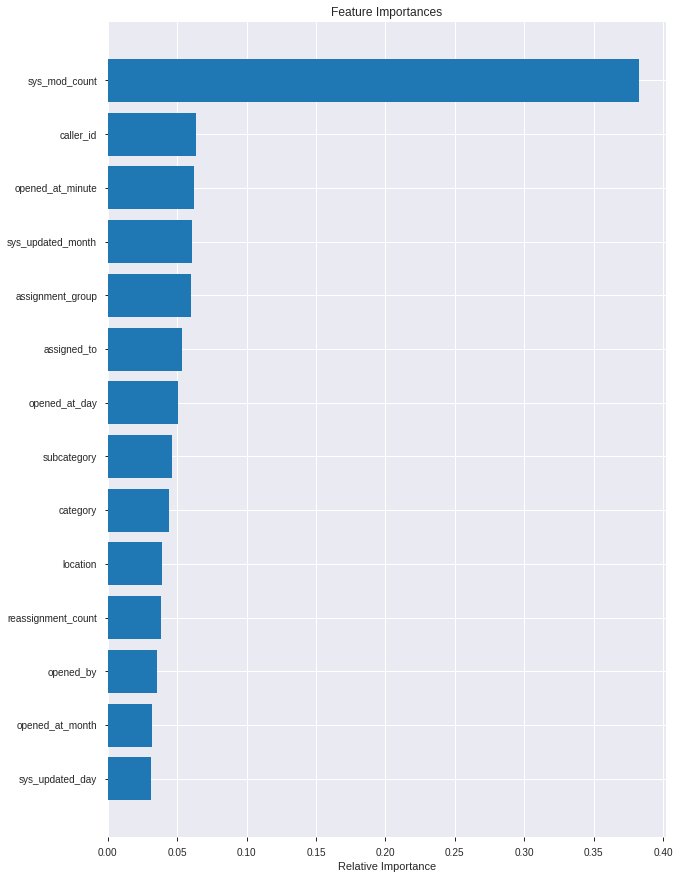

In [556]:
features = train_X.columns
importances = bestmodel.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [557]:
## Save the Model to disk
filename = 'bestmodelrandom.pkl'
pickle.dump(bestmodel, open(filename, 'wb'))

# Pickle file is saved as we have done in the course and now it can  be used for model deployment on every level, I will transform it in django-rest-api by using it. 